In [18]:
from datetime import datetime
import itertools
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
plt.style.use('fivethirtyeight')

In [19]:
from iexfinance.stocks import get_historical_data
def get_iex_data(stock_list, start=datetime(2015,1,1), end=datetime(2019,12,31)):
    return_list = []
    for i in stock_list:
        df = pd.DataFrame(get_historical_data(i, start, end, output_format='pandas', token='pk_d28c0190de7a4d6da30b3bd2b08487c8'))
        df['ticker'] = i
        return_list.append(df)
    return return_list

## Import Data

In [20]:
hun_etfs = ['VV']
data = get_iex_data(hun_etfs)
data

[              open    high     low   close  volume ticker
 date                                                     
 2015-01-12   93.94   93.94   92.73   93.05  194952     VV
 2015-01-13   93.72   94.35   92.21   92.84  188746     VV
 2015-01-14   91.71   92.34   91.23   92.29  169325     VV
 2015-01-15   92.58   92.69   91.37   91.44  132171     VV
 2015-01-16   91.26   92.69   91.24   92.58  127697     VV
 ...            ...     ...     ...     ...     ...    ...
 2019-12-24  147.65  147.65  147.38  147.59   77589     VV
 2019-12-26  147.77  148.31  147.59  148.31  101581     VV
 2019-12-27  148.70  148.70  148.08  148.26  128849     VV
 2019-12-30  148.39  148.39  147.24  147.44  227833     VV
 2019-12-31  147.16  147.94  147.00  147.84  206680     VV
 
 [1252 rows x 6 columns]]

In [21]:
vv = data[0]
vv.to_csv('vv.csv', encoding='utf-8')

In [22]:
def clean_data(data):
    for i in range(len(data)):
        data[i] = data[i].reset_index()
        data[i]['date'] = pd.to_datetime(data[i]['date'])
        data[i] = data[i].set_index('date')
    return data

In [23]:
data = clean_data(data)

In [24]:
data

[              open    high     low   close  volume ticker
 date                                                     
 2015-01-12   93.94   93.94   92.73   93.05  194952     VV
 2015-01-13   93.72   94.35   92.21   92.84  188746     VV
 2015-01-14   91.71   92.34   91.23   92.29  169325     VV
 2015-01-15   92.58   92.69   91.37   91.44  132171     VV
 2015-01-16   91.26   92.69   91.24   92.58  127697     VV
 ...            ...     ...     ...     ...     ...    ...
 2019-12-24  147.65  147.65  147.38  147.59   77589     VV
 2019-12-26  147.77  148.31  147.59  148.31  101581     VV
 2019-12-27  148.70  148.70  148.08  148.26  128849     VV
 2019-12-30  148.39  148.39  147.24  147.44  227833     VV
 2019-12-31  147.16  147.94  147.00  147.84  206680     VV
 
 [1252 rows x 6 columns]]

In [25]:
ts = data[0]['close']

## ARIMA analysis

In [26]:
# p = d = q = range(0,3)
# pdq = list(itertools.product(p,d,q))
# pdqs = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]
# ans = []
# for comb in pdq:
#     for combs in pdqs:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(ts,
#                                             order=comb,
#                                             seasonal_order=combs,
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False)

#             output = mod.fit()
#             ans.append([comb, combs, output.aic])
#             print('ARIMA {} x {} : AIC Calculated ={}'.format(comb, combs, output.aic))
#         except:
#             continue    

In [27]:
# ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
# ans_df.loc[ans_df['aic'].idxmin()]

In [28]:
ARIMA_model = sm.tsa.statespace.SARIMAX(ts,
                                order=(2, 2, 2),
                                seasonal_order=(0, 0, 2, 5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
output = ARIMA_model.fit()
print(output.summary().tables[1])


C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8144      0.086     -9.419      0.000      -0.984      -0.645
ar.L2         -0.0672      0.019     -3.463      0.001      -0.105      -0.029
ma.L1          0.2436      2.389      0.102      0.919      -4.439       4.926
ma.L2         -1.2436      3.007     -0.414      0.679      -7.137       4.650
ma.S.L5       -0.0564      0.024     -2.324      0.020      -0.104      -0.009
ma.S.L10      -0.0249      0.021     -1.194      0.233      -0.066       0.016
sigma2         0.5708      1.387      0.411      0.681      -2.148       3.290


In [29]:
csv_output = output.summary().tables[1]

summary_df = pd.DataFrame(csv_output, index=None)
# csv_output.to_csv('spy_summary.csv', encoding='utf-8')
# csv_output
summary_df.columns = summary_df.iloc[0]
summary_df = summary_df[1:]

summary_df.to_csv('vv_summary.csv', encoding='utf-8')
summary_df


,,coef,std err,z,P>|z|,[0.025,0.975]
1,ar.L1,-0.8144,0.086,-9.419,0.000,-0.984,-0.645
2,ar.L2,-0.0672,0.019,-3.463,0.001,-0.105,-0.029
3,ma.L1,0.2436,2.389,0.102,0.919,-4.439,4.926
4,ma.L2,-1.2436,3.007,-0.414,0.679,-7.137,4.650
5,ma.S.L5,-0.0564,0.024,-2.324,0.020,-0.104,-0.009
6,ma.S.L10,-0.0249,0.021,-1.194,0.233,-0.066,0.016
7,sigma2,0.5708,1.387,0.411,0.681,-2.148,3.290


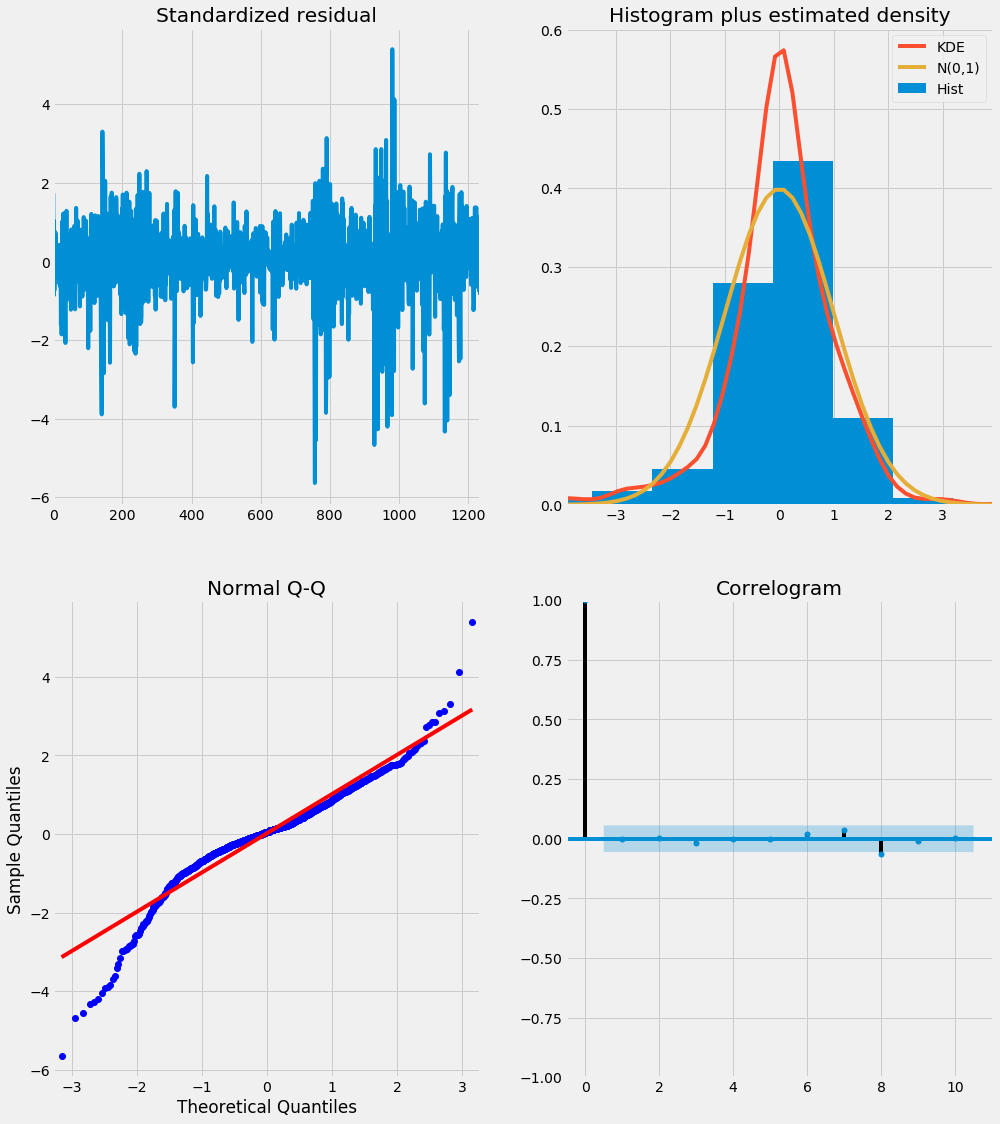

In [30]:
output.plot_diagnostics(figsize=(15, 18))
plt.savefig('vvoutput.png')
plt.show()

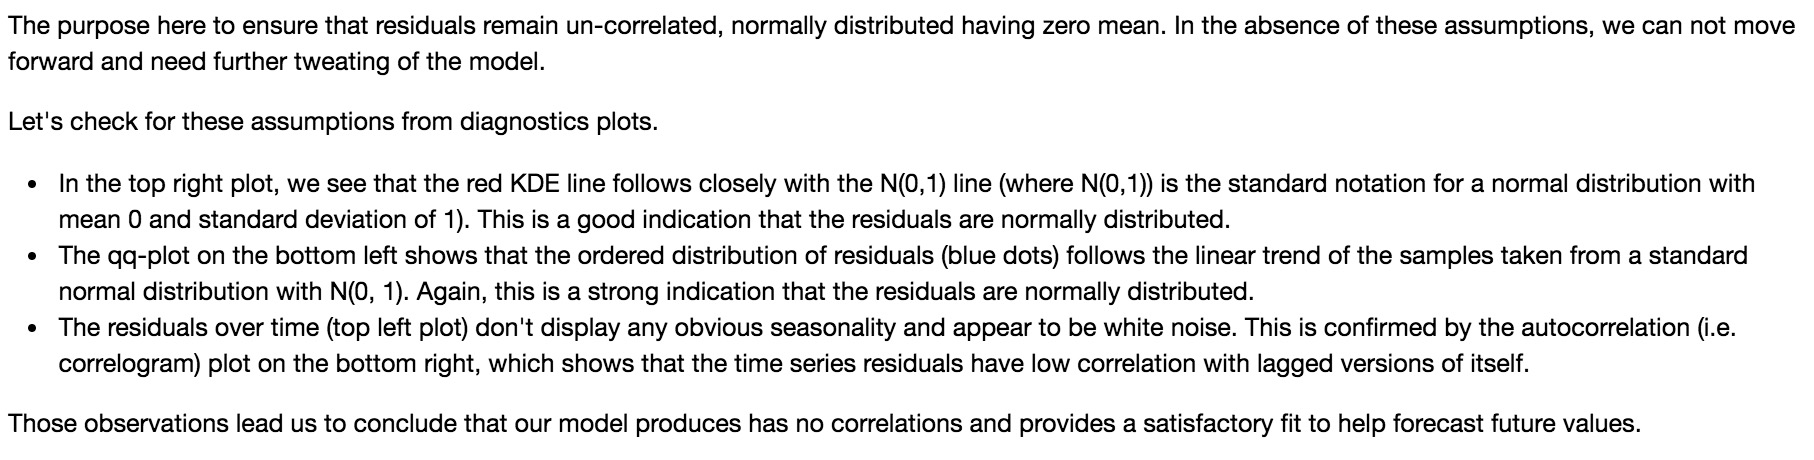

In [31]:
# plt.savefig('arima1.png')

<Figure size 432x288 with 0 Axes>

In [31]:
pred = output.get_prediction(start=pd.to_datetime('2019-11-01'), dynamic=False)
pred_conf = pred.conf_int()

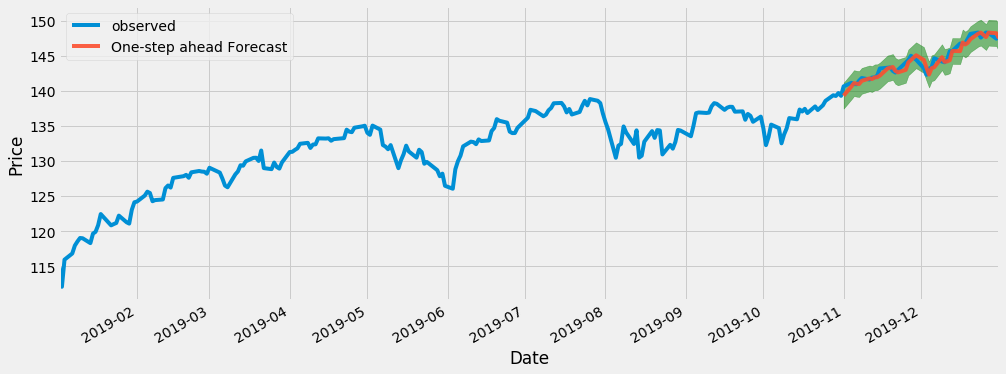

In [32]:
rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax = ts['2019':].plot(label='observed')

#Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)

#Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.savefig('vvpred.png')
plt.show()

In [33]:
price_forecasted = pred.predicted_mean
price_truth = ts['2019-11-01':]

# Compute the mean square error
mse = ((price_forecasted - price_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.41


In [34]:
pred_dynamic = output.get_prediction(start=pd.to_datetime('2019-11-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

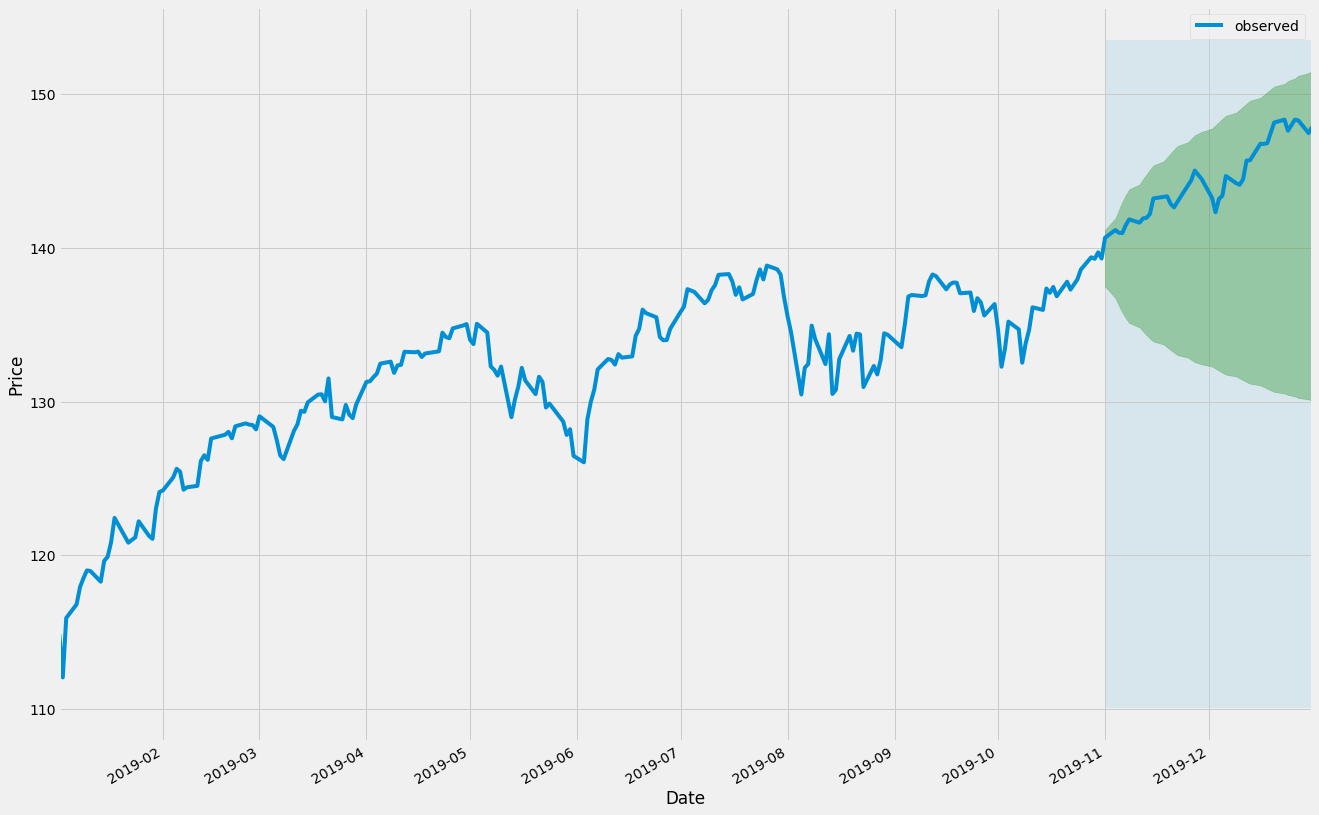

In [35]:
ax = ts['2019':].plot(label='observed', figsize=(20, 15))
# datum.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2019-11-01'), price_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.savefig('vvpred2.png')
plt.show()

In [36]:
price_forecasted = pred_dynamic.predicted_mean
price_truth = ts['2019-11-01':]

# Compute the mean square error
mse = ((price_forecasted - price_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 21.92


In [37]:
prediction = output.get_forecast(steps=50)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


## FBProphet for Future

In [38]:
from fbprophet import Prophet as proph
spy = pd.DataFrame(data[0]['close']).reset_index()
spy.columns = ['ds', 'y']

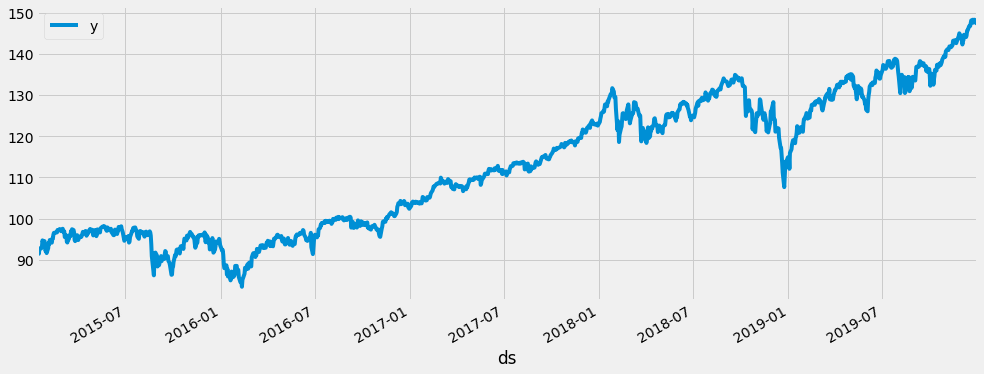

In [39]:
spy.set_index('ds').plot()

In [40]:
p = proph(interval_width=.95)
p.fit(spy)
inp = p.make_future_dataframe(periods=30, freq='D')
out = p.predict(inp)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [41]:
df = out[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [42]:
spy_df_novjan = df.tail(71)
spy_df_novjan.dtypes

ds            datetime64[ns]
yhat                 float64
yhat_lower           float64
yhat_upper           float64
dtype: object

In [46]:
# def get_iex_data(stock_list, start=datetime(2019,11,1), end=datetime(2020,1,10)):
#     return_list = []
#     for i in stock_list:
#         df = pd.DataFrame(get_historical_data(i, start, end, output_format='pandas', token='pk_d28c0190de7a4d6da30b3bd2b08487c8'))
#         df['ticker'] = i
#         return_list.append(df)
#     return return_list
# etf = ['VV']
# data = get_iex_data(etf)
# pull = data[0]['close']
# pull_df = pd.DataFrame(pull)

In [49]:
# pull_df

In [50]:
spy_yf = pd.read_csv('VV_yf.csv')
spy_yf = spy_yf.rename(columns={"Date": "ds"})
spy_yf['ds'] = pd.to_datetime(spy_yf['ds'])

spy_yf.dtypes

ds           datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [51]:
spy_yf1 = spy_yf[['ds','Adj Close']]
spy_yf1

,ds,Adj Close
0,2019-11-04,140.409134
1,2019-11-05,140.230072
2,2019-11-06,140.210175
3,2019-11-07,140.727478
4,2019-11-08,141.095566
5,2019-11-11,140.886642
6,2019-11-12,141.155243
7,2019-11-13,141.195038
8,2019-11-14,141.443741
9,2019-11-15,142.448517


In [60]:
comb = spy_df_novjan.join(spy_yf1.set_index('ds'), on='ds')
# comb = comb.set_index('ds')
comb['difference'] = comb['Adj Close'] - comb['yhat']
comb['difference_pct'] = comb['difference']/comb['Adj Close']
comb['difference_pct'] = comb['difference_pct'].map("{:.2%}".format)
comb.to_csv('vv_predict_fbprophet.csv', encoding='utf-8')
comb = comb.drop([1252])
comb = comb.drop([1255])
comb = comb.drop([1256])
comb.tail(50)

,ds,yhat,yhat_lower,yhat_upper,Adj Close,difference,difference_pct
1229,2019-11-27,143.666075,139.797030,147.457367,144.249146,0.583071,0.40%
1230,2019-11-29,143.945227,139.857991,147.744522,143.701981,-0.243246,-0.17%
1231,2019-12-02,144.259032,140.136787,148.013451,142.488297,-1.770735,-1.24%
1232,2019-12-03,144.450117,140.308442,148.211069,141.553162,-2.896955,-2.05%
1233,2019-12-04,144.546025,141.064538,148.575860,142.418671,-2.127354,-1.49%
1234,2019-12-05,144.661232,140.814111,148.592180,142.627579,-2.033653,-1.43%
1235,2019-12-06,144.748275,140.874499,148.691305,143.900955,-0.847320,-0.59%
1236,2019-12-09,144.899033,140.789002,148.703665,143.433380,-1.465653,-1.02%
1237,2019-12-10,145.025296,141.292466,149.084976,143.333908,-1.691388,-1.18%
1238,2019-12-11,145.052613,141.376716,148.884013,143.692047,-1.360566,-0.95%


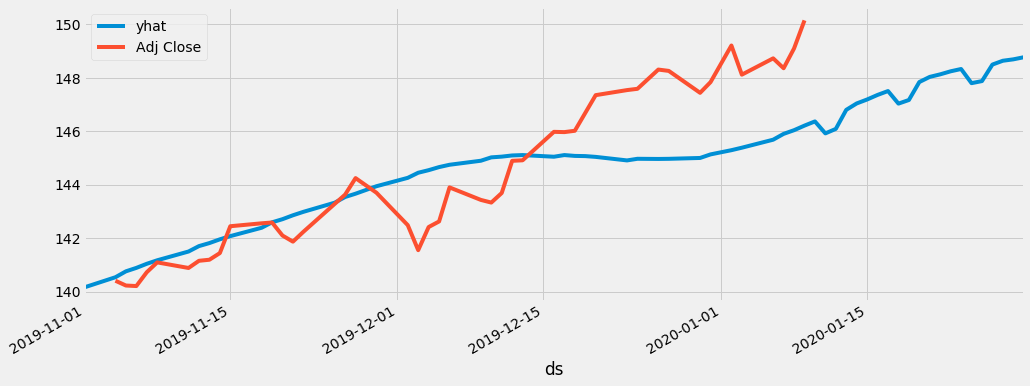

In [61]:
comb.plot(x="ds", y=["yhat", "Adj Close"], kind="line")
plt.savefig('vv_fbproph_forecast.png')

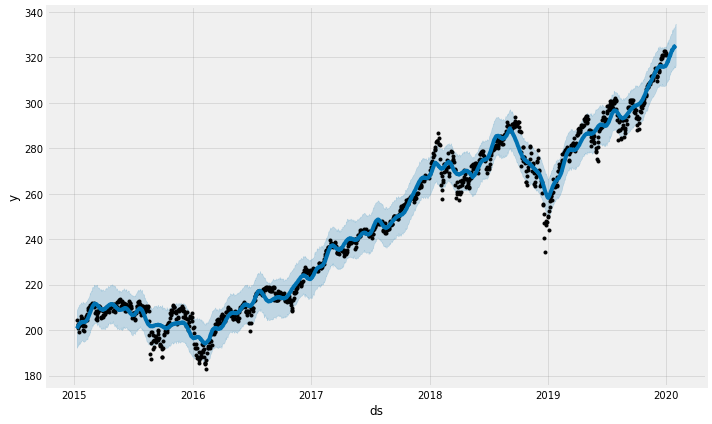

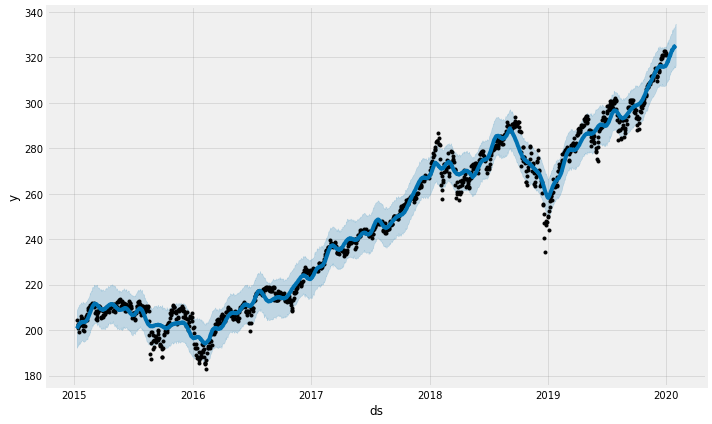

In [44]:
p.plot(df)
plt.savefig('what.png')

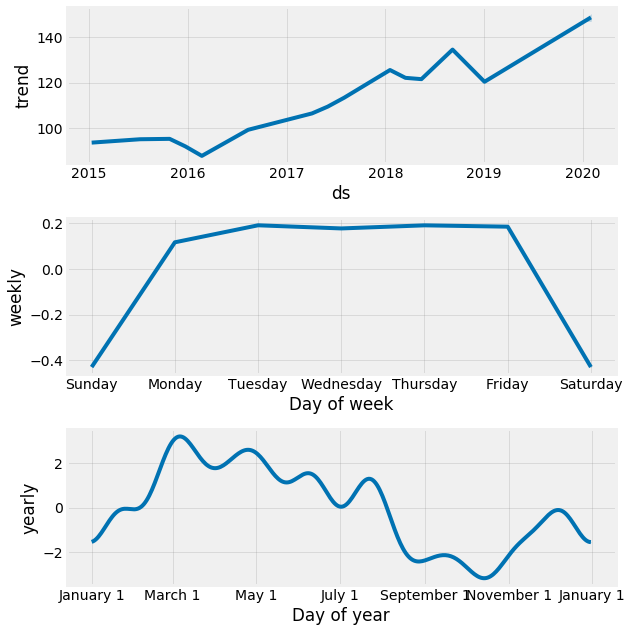

In [56]:
p.plot_components(out)
plt.savefig('vvmovement.png')

In [57]:
split = pd.to_datetime('2019-12-01')
true = spy.set_index('ds')[split:]
past = spy.set_index('ds')[:split].reset_index()

In [58]:
pro = proph(interval_width=.95)
pro.fit(past)
inp = pro.make_future_dataframe(periods=20, freq='D').set_index('ds')[split:].reset_index()
out = pro.predict(inp)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [59]:
pred = out[['ds', 'yhat']].set_index('ds')